# Chapter 3 > Exercise 8

<b>This question involves the use of simple linear regression on the Auto data set.</b><br>
(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:<br>
> i. Is there a relationship between the predictor and the response?<br>
ii. How strong is the relationship between the predictor and the response?<br>
iii. Is the relationship between the predictor and the response positive or negative?<br>
iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?<br>

(b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.<br>
(c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

In [35]:
Auto = read.table("Auto.data", header = T, na.strings = "?")
Auto = na.omit(Auto)
Auto[1:5,]

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino


In [53]:
summary(Auto[,c(1,4)])

      mpg          horsepower   
 Min.   : 9.00   Min.   : 46.0  
 1st Qu.:17.00   1st Qu.: 75.0  
 Median :22.75   Median : 93.5  
 Mean   :23.45   Mean   :104.5  
 3rd Qu.:29.00   3rd Qu.:126.0  
 Max.   :46.60   Max.   :230.0  

<b>(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:

> i. Is there a relationship between the predictor and the response?<br>
<font color="green">Comment: Coefficient p-value of predictor horsepower is statisticaly significant. Hence, it is related with response.</font><br>
    
> ii. How strong is the relationship between the predictor and the response?<br>
<font color="green">Comment: R-square of model is 60.60%, means predictor explains 60.6% of relationship with response.</font><br>
    
> iii. Is the relationship between the predictor and the response positive or negative?<br>
<font color="green">Comment: Negative coefficient value (-0.1578) indicate negative relation with response.</font><br>   
    
> iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?<br>
<font color="green">Comment: Predicted mpg 24.47 at 98 HP. Both the intervals are created below.</font>

In [5]:
lmodel = lm(mpg~horsepower, data=Auto)
summary(lmodel)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


In [13]:
predict(lmodel, newdata=data.frame(horsepower = c(98)), interval = "confidence")

,fit,lwr,upr
1,24.46708,23.97308,24.96108


In [12]:
predict(lmodel, newdata=data.frame(horsepower = c(98)), interval = "prediction")

,fit,lwr,upr
1,24.46708,14.8094,34.12476


<b>(b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.

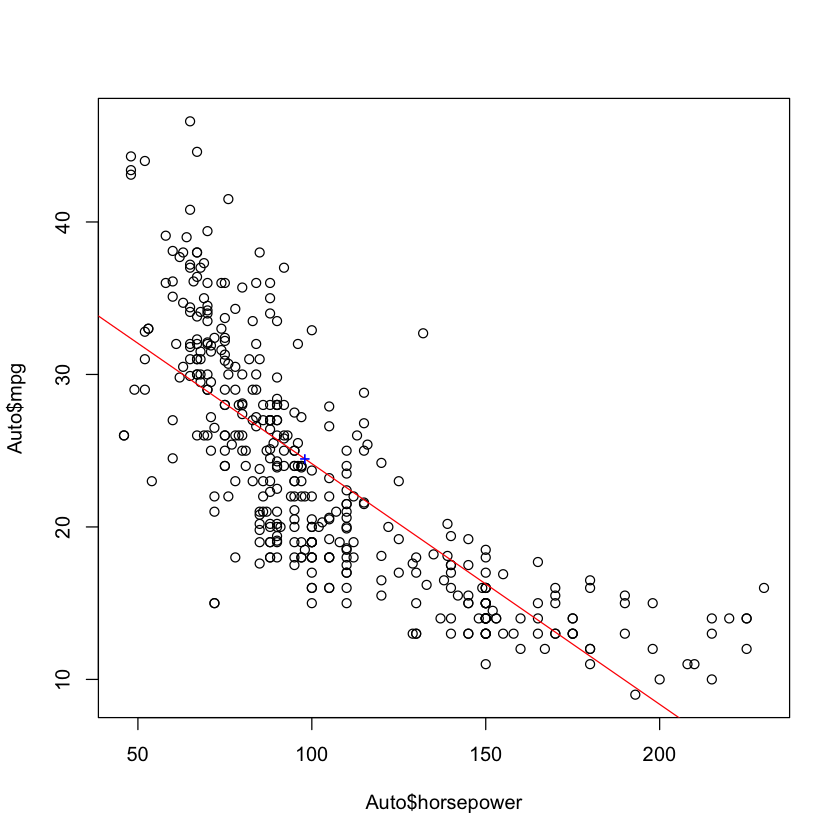

In [20]:
plot(Auto$horsepower, Auto$mpg)
abline(lmodel, col="red", lwd=1)
points(c(98), c(24.47), col="blue", pch='+') #also, plotting predicted response

<b>(c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.</b>
> <font color="green">Comment:<br>1. Residuals variance is not constant around zero-line in fig 1. It represent a non-linear relation.<br>2. Q-Q Plot fig 2, residual quantiles are falling onto the normal distribution line between -1.5 & 1.5 of theoritical z-value. Residuals seems normally distributed within range (-1.5,1.5) only.
</font>

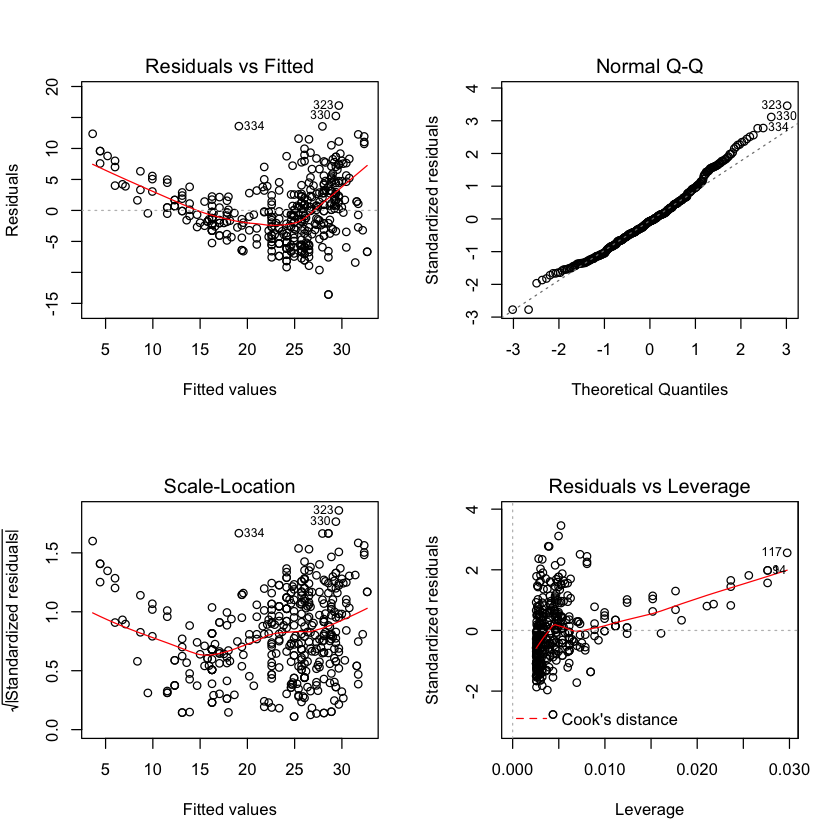

In [32]:
par(mfrow=c(2,2)) # create 2x2 frame for 4 plots
plot(lmodel)